In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Livanty/DatasetW2/refs/heads/main/diabetes.csv') #Membaca file data csv
df.sample(10) #Menunjukan 10 data acak

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
58,0,146,82,0,0,40.5,1.781,44,0
466,0,74,52,10,36,27.8,0.269,22,0
267,2,128,64,42,0,40.0,1.101,24,0
309,2,124,68,28,205,32.9,0.875,30,1
719,5,97,76,27,0,35.6,0.378,52,1
119,4,99,76,15,51,23.2,0.223,21,0
62,5,44,62,0,0,25.0,0.587,36,0
661,1,199,76,43,0,42.9,1.394,22,1
343,5,122,86,0,0,34.7,0.290,33,0
534,1,77,56,30,56,33.3,1.251,24,0


In [4]:
df.info() #digunakan untuk menampilkan ringkasan informasi tentang struktur DataFrame, termasuk jumlah baris, kolom, tipe data, nilai non-null, dan penggunaan memori.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe() #digunakan untuk menghasilkan statistik deskriptif (seperti mean, median, standar deviasi, dan quartiles) untuk kolom numerik dalam DataFrame.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


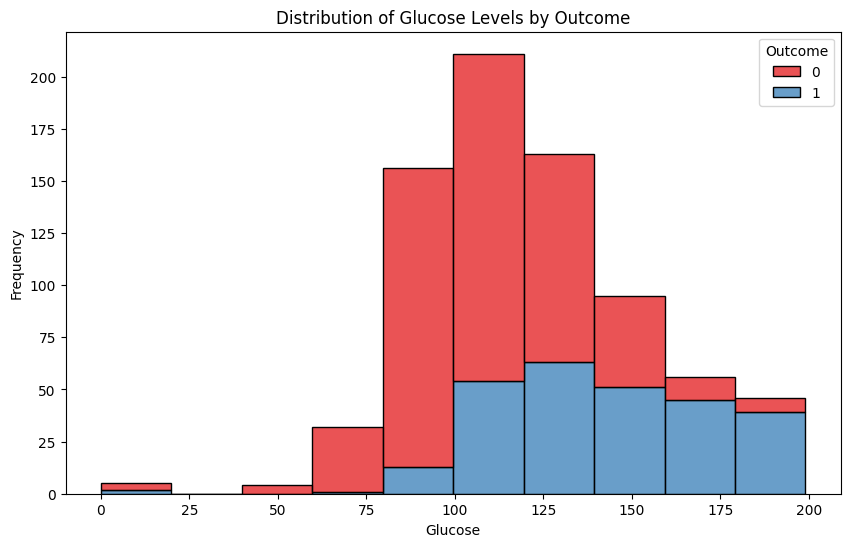

In [9]:
# Membuat histogram untuk Glucose berdasarkan Outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Glucose', hue='Outcome', multiple='stack', bins=10, palette='Set1')

# Menambahkan judul dan label
plt.title('Distribution of Glucose Levels by Outcome')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

# Distribusi ini menunjukkan bahwa kadar glukosa yang lebih tinggi sangat terkait dengan outcome diabetes.
# Semakin tinggi kadar glukosa, semakin tinggi pula kemungkinan individu tersebut

<ipython-input-7-920795a124c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette="Set3")


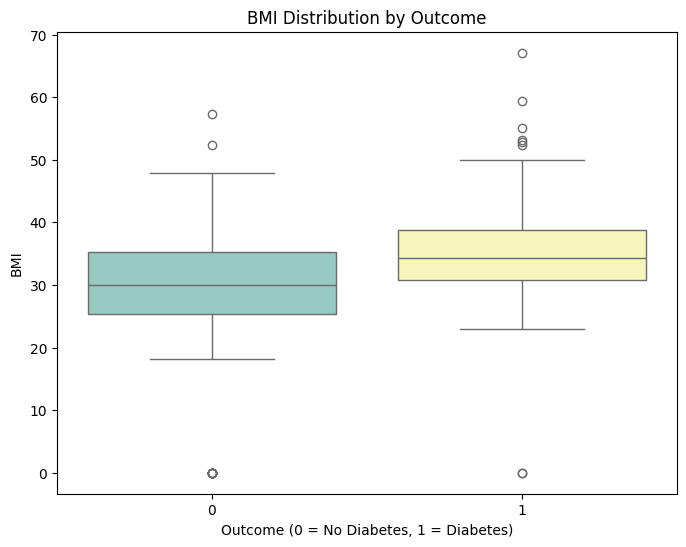

In [7]:
# Membuat boxplot untuk BMI berdasarkan Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=df, palette="Set3")
plt.title('BMI Distribution by Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('BMI')
plt.show()

# Biasanya banyak literatur yang mengatakan bahwa orang kali  sering kali mengaitkan BMI yang lebih tinggi dengan risiko diabetes yang lebih besar.
# Box plot ini menunjukkan bahwa individu dengan diabetes cenderung memiliki BMI yang lebih tinggi dibandingkan dengan individu yang tidak menderita diabetes.

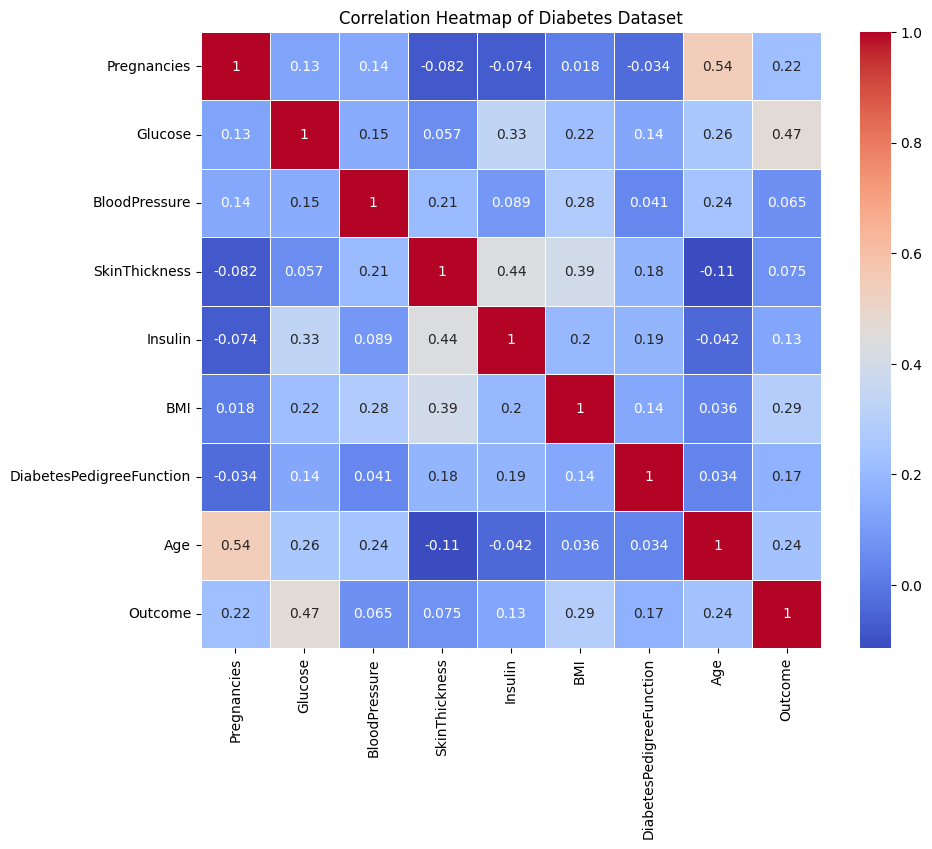

In [10]:
# Menghitung korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

In [11]:
X = df.drop(['Outcome'], axis = 1) #Membuat variabel X yang berisi semua kolom dari DataFrame df, kecuali kolom species.
y = df['Outcome'] #Membuat variabel y yang berisi kolom species dari DataFrame df.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) #untuk membagi dataset menjadi dua bagian: satu untuk pelatihan (training 80%) dan satu untuk pengujian (testing 20%).

In [13]:
X_train.shape, X_test.shape # untuk menunjukkan jumlah baris dan kolom

((614, 8), (154, 8))

Decision Tree

In [14]:
#Criterion Entropy
#a
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [15]:
#b
y_pred_en = clf_en.predict(X_test) #untuk mendapatkan hasil prediksi tentang outcome penguin dari data pengujian

In [16]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en))) #print hasil akurasi

Model accuracy score with criterion entropy: 0.7662


In [17]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7752
Test set score: 0.7662


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples

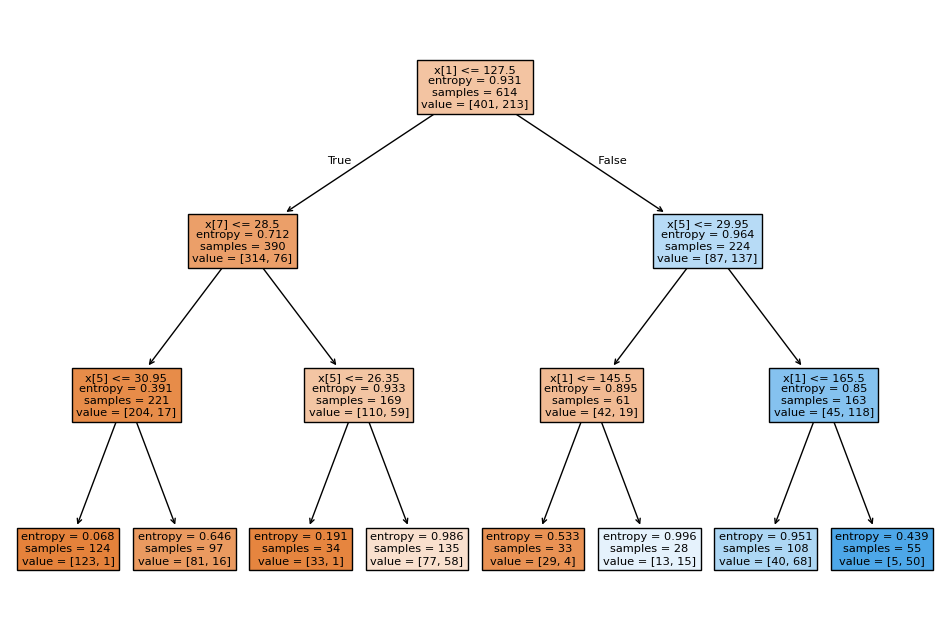

In [18]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled=True) #Membuat tree yang ada warnanya


In [19]:
#a

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [20]:
#b
y_pred_gini = clf_gini.predict(X_test)  #untuk mendapatkan hasil prediksi tentang spesies penguin dari data pengujian menggunakan gini

In [21]:
#c
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #Untuk print hasil akurasi

Model accuracy score with criterion gini: 0.7597


In [22]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7769
Test set score: 0.7597


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(

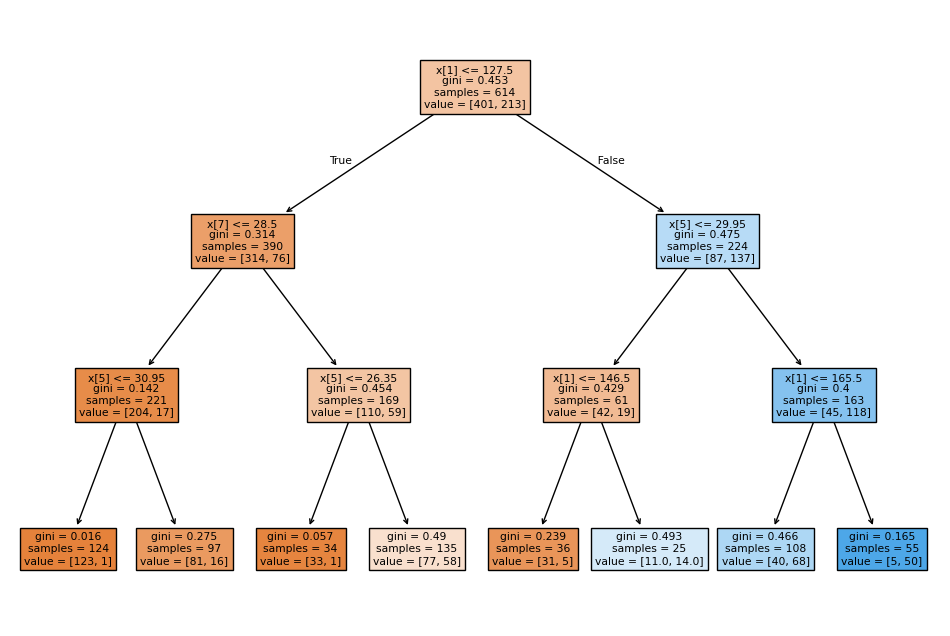

In [23]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True) #membuat dan menujukan tree


In [24]:
#f
cm = confusion_matrix(y_test, y_pred_en) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cm)

cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[83 16]
 [20 35]]
Confusion Matrix:
 [[83 16]
 [21 34]]


In [25]:
#g
print(classification_report(y_test, y_pred_en)) #untuk membuat dan print classificaton report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
#h
# Kedua model menunjukkan performa yang cukup baik dalam mengklasifikasikan spesies penguin berdasarkan kolom yang ada, baik untuk train set dan test set.
# Keduanya mendapatkan akurasi diatas 70 %
# Namun jika kita lihat model dengan kriteria entropi memberikan hasil yang lebih akurat dibandingkan dengan kriteria gini.

Naive Bayes

In [26]:
#a
nb_classifier = GaussianNB() # untuk menginstansiasi objek Gaussian Naive Bayes dari pustaka scikit-learn.
nb_classifier.fit(X_train, y_train) # untuk melatih model Naive Bayes yang telah dibuat (nb_classifier) dengan data fitur X_train dan label y_train.

GaussianNB()

In [27]:
#b
nb_y_pred = nb_classifier.predict(X_test) # untuk memprediksi label (target) menggunakan model Naive Bayes yang telah dilatih sebelumnya (nb_classifier).

In [28]:
#c
cm = confusion_matrix(y_test, nb_y_pred) #Untuk membuat confussion matrix dari nb
print("Confusion Matrix:\n", cm)

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred))) #Untuk menujukan hasil akurasi

Confusion Matrix:
 [[79 20]
 [16 39]]
Accuracy Score: 0.7662


In [29]:
#e
print(classification_report(y_test, nb_y_pred)) #Untuk print classification report

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
# f
# Dari hasil yang didapat akurasi yang dimiliki oleh naive bayes ini tidak beda jauh dari decision tree yaitu diatas dari 70%.
# Artinya naive bayes ini masih dibilang cukup bagus dalan mengkasifikasian untuk data diabetes ini.

Logistic regresion

In [34]:
# Menggunakan Metode Logistic regresion
# a define the model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)  # membuat model logisticc regresion


LogisticRegression(max_iter=200)

In [40]:
# b
y_pred_log = classifier.predict(X_test) # membuat prediksi
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
comparison_table.head() # menampilkan 5 baris pertama dari DataFrame

,y_test,y_pred
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0


In [36]:
#c
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log))) # print hasil accuracy score

Accuracy Score: 0.7468


In [37]:
# d
cmatrix = confusion_matrix(y_test, y_pred_log)  #untuk membuat matrix
print("Confusion Matrix:\n", cmatrix)

Confusion Matrix:
 [[78 21]
 [18 37]]


In [38]:
# e
print (classification_report (y_test, y_pred_log)) # print hasil classification report

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
# f
# Logistic Regresin disini menujukan hasil 0.7468 yang brati diatas 70 %
# Dari ketiga data ini Model accuracy score with criterion gini: 0.7597, Model accuracy score with criterion entropy: 0.7662, Model Naive Bayes: 0.7662, Model Logistic Regresion: 0.7468
# Sehingga untuk prediksi diabetes ini lebih disarankan menggunakan 1. Entropi 2. Naive 3. Gini 4. Logistic Regresion
